In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# **Upload de base de dados**

In [120]:
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#**Explorando dados**

In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


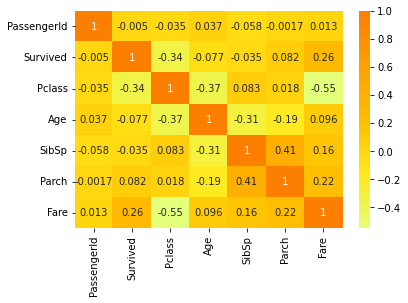

In [70]:
sns.heatmap(titanic.corr(), cmap="Wistia", annot=True)
plt.show()

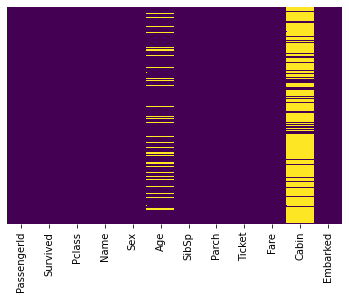

In [71]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

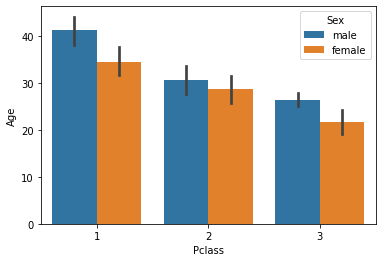

In [72]:
#Média de idade por classe e sexo
ax = sns.barplot(x="Pclass", y="Age", hue="Sex", data=titanic)


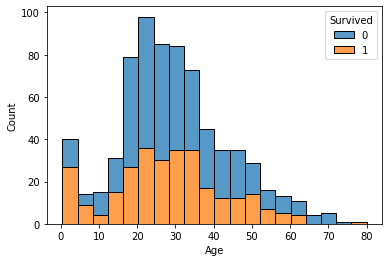

In [73]:
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='stack')
plt.show()

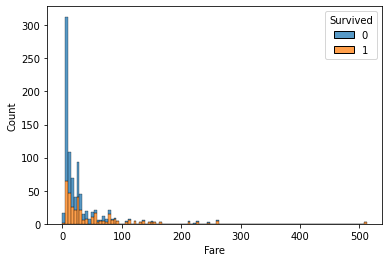

In [74]:
sns.histplot(data=titanic, x='Fare', hue='Survived', multiple='stack')
plt.show()

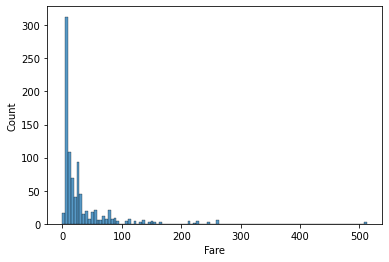

In [75]:
sns.histplot(data=titanic, x='Fare')
plt.show()

#**Tratando os dados**

##**Removendo Colunas que não agregam**

In [122]:
titanic.drop(['Name', 'Ticket','PassengerId', 'Cabin'], axis=1, inplace=True)

##**Tratando os valores nulos por coluna**

In [123]:
# Substituindo os valores nulos de Age pela média
titanic.loc[(titanic['Age'].isnull()) & (titanic['Sex'] == 'male'), 'Age'] = titanic[titanic['Sex'] == 'male']['Age'].mean()
titanic.loc[(titanic['Age'].isnull()) & (titanic['Sex'] == 'female'), 'Age'] = titanic[titanic['Sex'] == 'female']['Age'].mean()

In [124]:
# Removendo linhas com valores NaN
titanic.dropna(inplace=True)

In [125]:
# Transformando gênero em valor numérico
gen = pd.get_dummies(titanic['Sex'])

In [126]:
# Transformando local de embarque em valor numérico
port = pd.get_dummies(titanic['Embarked'])

In [127]:
# Concatenando
titanic = pd.concat([titanic, gen, port], axis=1)

In [128]:
titanic.drop(['Embarked', 'Sex'], axis=1, inplace=True)

In [129]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   female    889 non-null    uint8  
 7   male      889 non-null    uint8  
 8   C         889 non-null    uint8  
 9   Q         889 non-null    uint8  
 10  S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [130]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [131]:
# Dividir a base para ser treinada e testada
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [132]:
# Normalizando 
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

scaler = StandardScaler()  
scaler.fit(x_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

x_train_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(x_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])  
x_test_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(x_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
x_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
486,-1.586317,0.385972,0.420921,-0.484112,1.124776,1,0,0,0,1
293,0.814387,-0.443038,-0.488152,-0.484112,-0.468406,1,0,0,0,1
173,0.814387,-0.669131,-0.488152,-0.484112,-0.486566,0,1,0,0,1
450,-0.385965,0.461337,0.420921,1.934506,-0.097351,0,1,0,0,1
361,-0.385965,-0.066215,0.420921,-0.484112,-0.097924,0,1,1,0,0


#**Criar o modelo KNN e treiná-lo**

In [134]:
#Criando KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

##**Executando o modelo**

In [136]:
y_train_pred = knn.predict(x_train_scaled)

In [137]:
knn.score(x_train_scaled, y_train)

0.8794212218649518

In [138]:
knn.score(x_test_scaled, y_test)

0.7715355805243446

**Avaliando o melhor valor de K**

Text(0, 0.5, 'Error Rate')

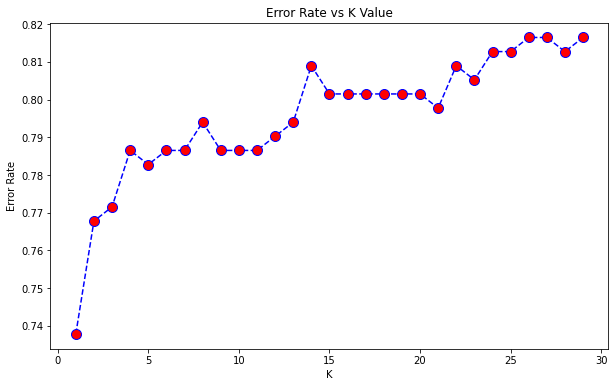

In [139]:
score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled, y_train)
  score.append(knn.score(x_test_scaled, y_test))
  
plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')